In [ ]:
!pip install python-bcb
from bcb import sgs
import pandas as pd
import yfinance as yf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tickers = ['AMER3.SA', 'SMTO3.SA', 'PETR4.SA', 'VALE3.SA', 'VIVA3.SA', 'ABEV3.SA', 'NTCO3.SA', 'BOVA11.SA']
start = "2022-08-18"
end = "2023-08-18"

stocks = yf.download(tickers, start, end)['Adj Close'].dropna()

In [27]:
selic = pd.DataFrame()
selic = sgs.get({'Selic': 11}, start = start, end = end, freq = 'D')
selic = selic / 100

In [28]:
stocks_ret_diario = stocks.pct_change()
stocks_ret_anual = stocks_ret_diario.mean() * 252

In [29]:
covariancia = stocks_ret_diario.cov() * 252
covariancia = covariancia['BOVA11.SA'].drop(['BOVA11.SA'])

In [30]:
beta = covariancia / (stocks_ret_diario['BOVA11.SA'].var() * 252)

In [31]:
selic_media = (1 + selic.mean()) ** 252 - 1
risk_premium = stocks_ret_anual['BOVA11.SA'] - selic_media.sum()

In [32]:
capm = selic_media.sum() + risk_premium * beta

In [9]:
stocks_ret_diario = stocks_ret_diario.drop(columns = ['BOVA11.SA'])
tickers.remove('BOVA11.SA')

In [10]:
qtd_carteiras = 100000
retorno = []
retorno_aux = []
volatilidade = []
volatilidade_aux = []
sharpe = []
sharpe_aux = []
peso_stocks = []

In [11]:
for p in range(qtd_carteiras):
  pesos = np.random.random(len(tickers))
  pesos /= np.sum(pesos)
  retorno_aux = np.dot(pesos, stocks_ret_diario.mean()) * 252
  volatilidade_aux = np.sqrt(np.sum(pesos ** 2 * stocks_ret_diario.var() * 252))
  sharpe_aux = (retorno_aux - selic_media.sum()) / volatilidade_aux
  retorno.append(retorno_aux)
  volatilidade.append(volatilidade_aux)
  sharpe.append(sharpe_aux)
  peso_stocks.append(pesos)

carteira = pd.DataFrame({'Retorno': retorno, 'Risco': volatilidade, 'Sharpe': sharpe})

In [12]:
for count, stock in enumerate(tickers):
    carteira['Peso de ' + stock] = [Peso[count] for Peso in peso_stocks]

<ipython-input-13-567fb6027dac>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


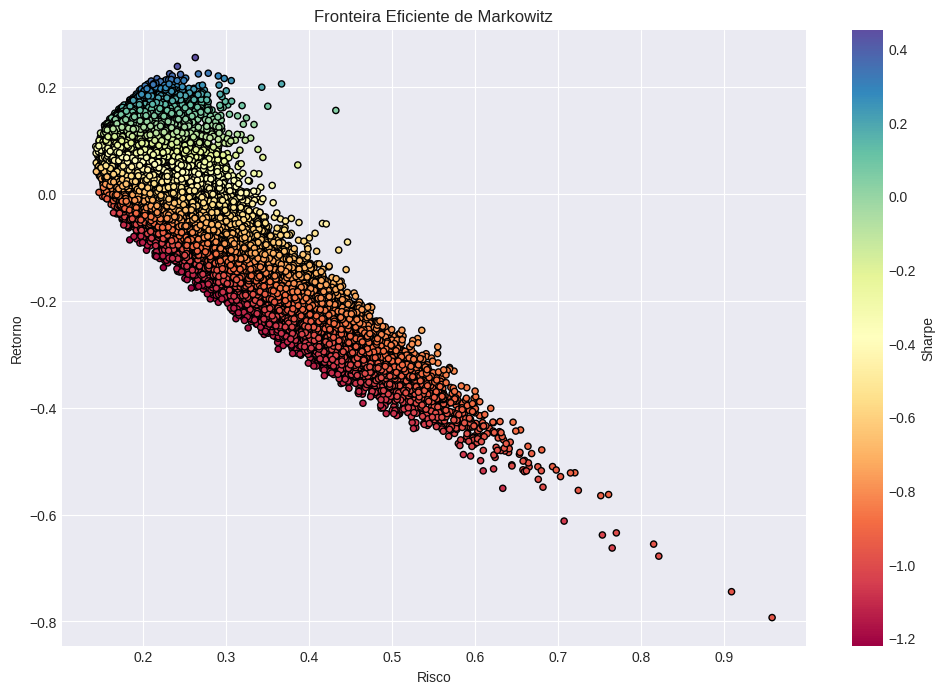

In [13]:
plt.style.use('seaborn-dark')
carteira.plot.scatter(x='Risco', y='Retorno', c = 'Sharpe', cmap = 'Spectral',
                      edgecolor='black', figsize=(12, 8), grid = True)
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

In [20]:
menor_risco = carteira['Risco'].min()
maior_sharpe = carteira['Sharpe'].max()

carteira_maior_sharpe = carteira.loc[carteira['Sharpe'] == maior_sharpe]
carteira_menor_risco = carteira.loc[carteira['Risco'] == menor_risco]

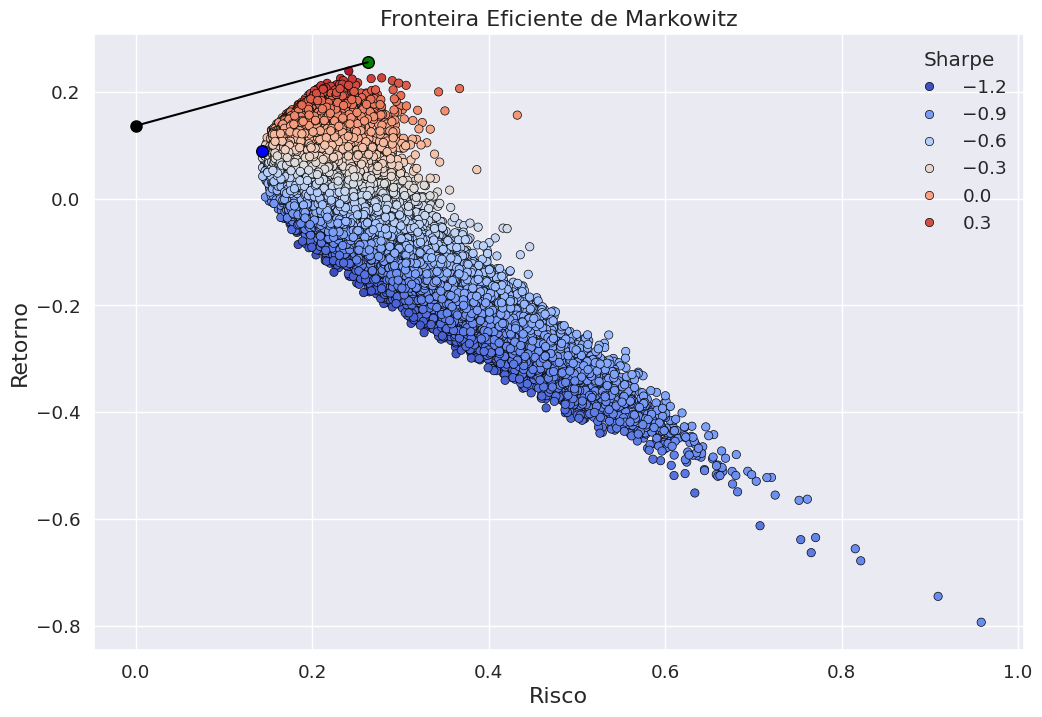

In [24]:
sns.set(rc={'figure.figsize': (12, 8)})
sns.set(font_scale=1.2)

plt.xlabel('Risco', fontsize=16)
plt.ylabel('Retorno', fontsize=16)
plt.title('Fronteira Eficiente de Markowitz', fontsize=16)

sns.scatterplot(data=carteira, x='Risco', y='Retorno', hue="Sharpe",
                edgecolor='black', palette='coolwarm')

plt.scatter(x=carteira_maior_sharpe['Risco'], y=carteira_maior_sharpe['Retorno'],
            c='green', marker='o', s=70, edgecolors='black')

plt.scatter(x= carteira_menor_risco['Risco'], y = carteira_menor_risco['Retorno'],
            c='blue', marker='o', s=70, edgecolors='black' )

mean_risco = carteira_maior_sharpe['Risco'].mean()
sum_retorno = carteira_maior_sharpe['Retorno'].sum()

plt.plot(0, selic_media.sum(), marker='o', markersize=8, color='black', markeredgecolor='black')
plt.plot([0, mean_risco], [selic_media.sum(), sum_retorno], color='black')

plt.show()

In [25]:
carteira

,Retorno,Risco,Sharpe,Peso de AMER3.SA,Peso de SMTO3.SA,Peso de PETR4.SA,Peso de VALE3.SA,Peso de VIVA3.SA,Peso de ABEV3.SA,Peso de NTCO3.SA
0,-0.086421,0.299688,-0.743046,0.082059,0.184282,0.169940,0.103059,0.206378,0.059019,0.195263
1,-0.053259,0.227311,-0.833751,0.196343,0.130521,0.076179,0.128499,0.214516,0.110121,0.143821
2,-0.109377,0.369776,-0.664290,0.022407,0.224862,0.273312,0.300790,0.093297,0.064178,0.021153
3,-0.237746,0.364495,-1.026096,0.157309,0.244981,0.009714,0.033658,0.268881,0.195602,0.089855
4,-0.247145,0.386749,-0.991357,0.217710,0.270058,0.116988,0.059949,0.094802,0.114756,0.125736
...,...,...,...,...,...,...,...,...,...,...
99995,0.040700,0.247868,-0.385535,0.015185,0.096973,0.157758,0.131479,0.376742,0.032566,0.189295
99996,0.100088,0.214295,-0.168802,0.177650,0.050757,0.276925,0.256707,0.070890,0.066952,0.100119
99997,-0.093218,0.309933,-0.740415,0.054767,0.195133,0.180669,0.160788,0.150494,0.096654,0.161494
99998,-0.167708,0.301665,-1.007637,0.289160,0.201904,0.121384,0.078104,0.098381,0.107291,0.103776


In [26]:
carteira_maior_sharpe.T

,56803
Retorno,0.255109
Risco,0.263088
Sharpe,0.451740
Peso de AMER3.SA,0.013630
Peso de SMTO3.SA,0.001126
Peso de PETR4.SA,0.057760
Peso de VALE3.SA,0.460429
Peso de VIVA3.SA,0.004560
Peso de ABEV3.SA,0.003638
Peso de NTCO3.SA,0.458856
